In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('Cleaned_Data.csv')
df.head()

,Temperature,Humidity,Wind Speed,Precipitation,Cloud Cover,Pressure,Rain Tomorrow,Month,Day,Year,...,Location_Los Angeles,Location_New York,Location_Philadelphia,Location_Phoenix,Location_San Antonio,Location_San Diego,Location_San Francisco,Location_San Jose,Location_Seattle,Location_Washington D.C.
0,87.524795,75.655455,28.379506,0.000000,69.617966,1026.030278,0,1,1,2024,...,0,1,0,0,0,0,0,0,0,0
1,83.259325,28.712617,12.436433,0.526995,41.606048,995.962065,0,1,2,2024,...,0,1,0,0,0,0,0,0,0,0
2,80.943050,64.740043,14.184831,0.916884,77.364763,980.796739,1,1,3,2024,...,0,1,0,0,0,0,0,0,0,0
3,78.097552,59.738984,19.444029,0.094134,52.541196,979.012163,0,1,4,2024,...,0,1,0,0,0,0,0,0,0,0
4,37.059963,34.766784,3.689661,1.361272,85.584000,1031.790859,0,1,5,2024,...,0,1,0,0,0,0,0,0,0,0


In [31]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,r2_score,f1_score,confusion_matrix,ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=df[['Temperature','Humidity','Wind Speed','Pressure']]
y=df['Rain Tomorrow']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
model=RandomForestClassifier(n_estimators=100,random_state=42)
model.fit(x_train, y_train)
y_pred=model.predict(x_test)


In [32]:
df.head(15)

,Temperature,Humidity,Wind Speed,Precipitation,Cloud Cover,Pressure,Rain Tomorrow,Month,Day,Year,...,Location_Los Angeles,Location_New York,Location_Philadelphia,Location_Phoenix,Location_San Antonio,Location_San Diego,Location_San Francisco,Location_San Jose,Location_Seattle,Location_Washington D.C.
0,87.524795,75.655455,28.379506,0.000000,69.617966,1026.030278,0,1,1,2024,...,0,1,0,0,0,0,0,0,0,0
1,83.259325,28.712617,12.436433,0.526995,41.606048,995.962065,0,1,2,2024,...,0,1,0,0,0,0,0,0,0,0
2,80.943050,64.740043,14.184831,0.916884,77.364763,980.796739,1,1,3,2024,...,0,1,0,0,0,0,0,0,0,0
3,78.097552,59.738984,19.444029,0.094134,52.541196,979.012163,0,1,4,2024,...,0,1,0,0,0,0,0,0,0,0
4,37.059963,34.766784,3.689661,1.361272,85.584000,1031.790859,0,1,5,2024,...,0,1,0,0,0,0,0,0,0,0
5,35.298648,56.598099,21.442424,0.582661,22.825103,1036.043397,0,1,6,2024,...,0,1,0,0,0,0,0,0,0,0
6,50.380818,95.424193,8.753319,0.000000,36.820958,1032.337889,0,1,7,2024,...,0,1,0,0,0,0,0,0,0,0
7,79.967007,28.186104,27.495322,0.105845,77.807459,1039.897652,0,1,8,2024,...,0,1,0,0,0,0,0,0,0,0
8,69.600506,30.248213,0.325415,0.000000,46.825566,1039.132281,0,1,10,2024,...,0,1,0,0,0,0,0,0,0,0
9,47.292800,33.177097,13.142199,0.000000,61.742291,997.772213,0,1,11,2024,...,0,1,0,0,0,0,0,0,0,0


Accuracy:0.7643638850889193
Confusion_Matrix:
[[10144  1292]
 [ 2153  1031]]


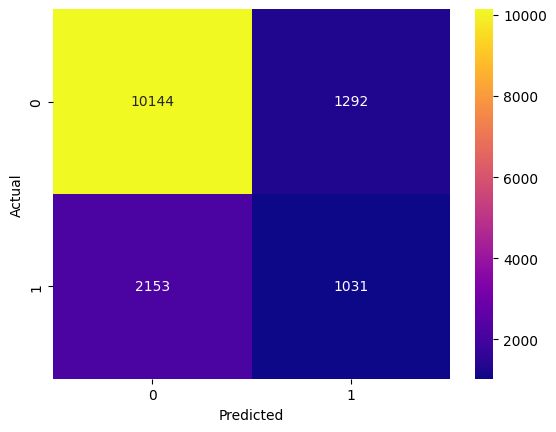

In [33]:
print(f'Accuracy:{accuracy_score(y_test,y_pred)}')
print(f'Confusion_Matrix:\n{confusion_matrix(y_test,y_pred)}')
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True,fmt="d",cmap="plasma")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [34]:
from sklearn.metrics import classification_report, roc_auc_score
print(classification_report(y_test,y_pred))
print("ROC-AUC:", roc_auc_score(y_test,model.predict_proba(x_test)[:,1]))


              precision    recall  f1-score   support

           0       0.82      0.89      0.85     11436
           1       0.44      0.32      0.37      3184

    accuracy                           0.76     14620
   macro avg       0.63      0.61      0.61     14620
weighted avg       0.74      0.76      0.75     14620



ROC-AUC: 0.8235176049669474


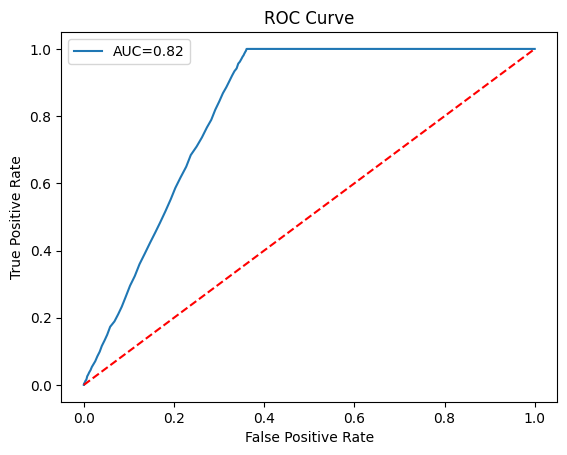

In [35]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
y_probs=model.predict_proba(x_test)[:,1]
fpr,tpr, _=roc_curve(y_test,y_probs)
roc_auc=roc_auc_score(y_test,y_probs)

plt.plot(fpr,tpr,label=f"AUC={roc_auc:.2f}")
plt.plot([0,1],[0,1],'r--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


In [36]:
import pickle
pickle.dump(model,open('model.pkl','wb'))